In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Bandit

# Exploring the API

In [2]:
my_bandit = Bandit()

In [3]:
my_bandit.n_arms

2

In [4]:
reward = my_bandit.pull(0)
reward

1

In [5]:
reward = my_bandit.pull(1)
reward

1

In [6]:
running_rewards = [[], []]

for _ in range(10):
    running_rewards[0].append(my_bandit.pull(0))
    running_rewards[1].append(my_bandit.pull(1))
    
running_rewards

[[1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1, 1, 1]]

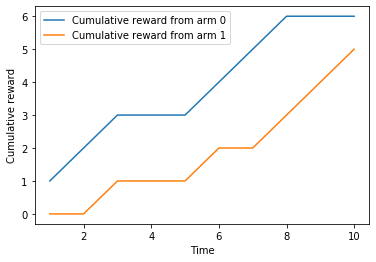

In [7]:
rounds = [i for i in range(1, 11)]

plt.plot(
    rounds, np.cumsum(running_rewards[0]),
    label='Cumulative reward from arm 0'
)

plt.plot(
    rounds, np.cumsum(running_rewards[1]),
    label='Cumulative reward from arm 1'
)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative reward')

plt.show()

# Greedy

In [8]:
class Greedy:
    def __init__(self, n_arms=2):
        self.n_arms = n_arms
        self.reward_history = [[] for _ in range(n_arms)]
    
    def decide(self):
        for arm_id in range(self.n_arms):
            if len(self.reward_history[arm_id]) == 0:
                return arm_id
            
        mean_rewards = [np.mean(history) for history in self.reward_history]
        
        return int(np.random.choice(
            np.argwhere(mean_rewards == np.max(mean_rewards)).flatten()
        ))
    
    def update(self, arm_id, reward):
        self.reward_history[arm_id].append(reward)

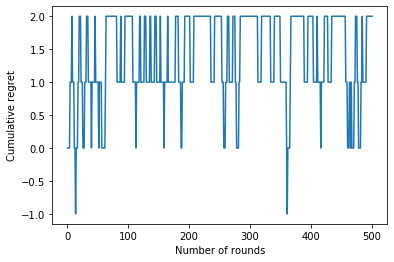

In [9]:
N_ARMS = 3

bandit = Bandit(
    optimal_arm_id=0,
    n_arms=3,
    reward_dists=[np.random.binomial for _ in range(N_ARMS)],
    reward_dists_params=[(1, 0.9), (1, 0.8), (1, 0.7)]
)

greedy_policy = Greedy(n_arms=N_ARMS)

history, rewards, optimal_rewards = bandit.automate(
    greedy_policy, n_rounds=500, visualize_regret=True
)

In [10]:
print(*history)

0 1 2 0 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


# Repeated experiments

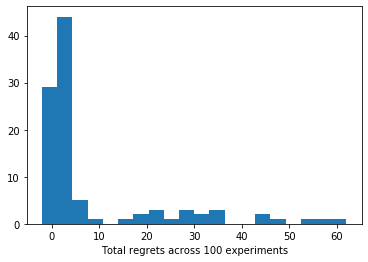

In [11]:
regrets = bandit.repeat(
    Greedy, [N_ARMS], n_experiments=100, n_rounds=300, visualize_regret_dist=True
)

In [12]:
np.mean(regrets), np.max(regrets)

(8.66, 62)